# Question 1. Parse the dataset and obtain the target column as a separate variable.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

We first upload the dataset we are using and check how it looks like.

In [40]:
data = pd.read_csv('./bank.csv', delimiter=';')

In [41]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


What is the distribution of the given dataset?

In [42]:
countno = len(data[data.y == 'no'])
countyes = len(data[data.y == 'yes'])
print('% of "No": {:.3f}%'. format((countno/(len(data.y))*100)))
print('% of "Yes": {:.3f}%'. format((countyes/(len(data.y))*100)))

% of "No": 88.476%
% of "Yes": 11.524%


The dataset is imbalanced because there is a large number of people not subscribed versus the ones who actually subscribed to the bank term loan.

In order to obtain the target value as a separate value, we have to do the following:

In [43]:
y = data["y"]
X = data.drop(columns='y')

In [44]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [45]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


# Question 2. Obtain a report of the different features inside the dataset, check if all the features are useful for our prediction, if not drop them.

To obtain a report, we can call the function **info** which gives us information about the size of the dataset, the name of the columns, the non-null count and the type of variable for each column.

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
dtypes: int64(7), object(9)
memory usage: 565.2+ KB


To get a more detailed report for the numerical features, we can use the function **describe**. It can help us to have more information about the distribution and variance of the numerical variables and to see if there are outliers. 

In [47]:
X.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


The next step for all the variables is to graphically look at their distribution. 

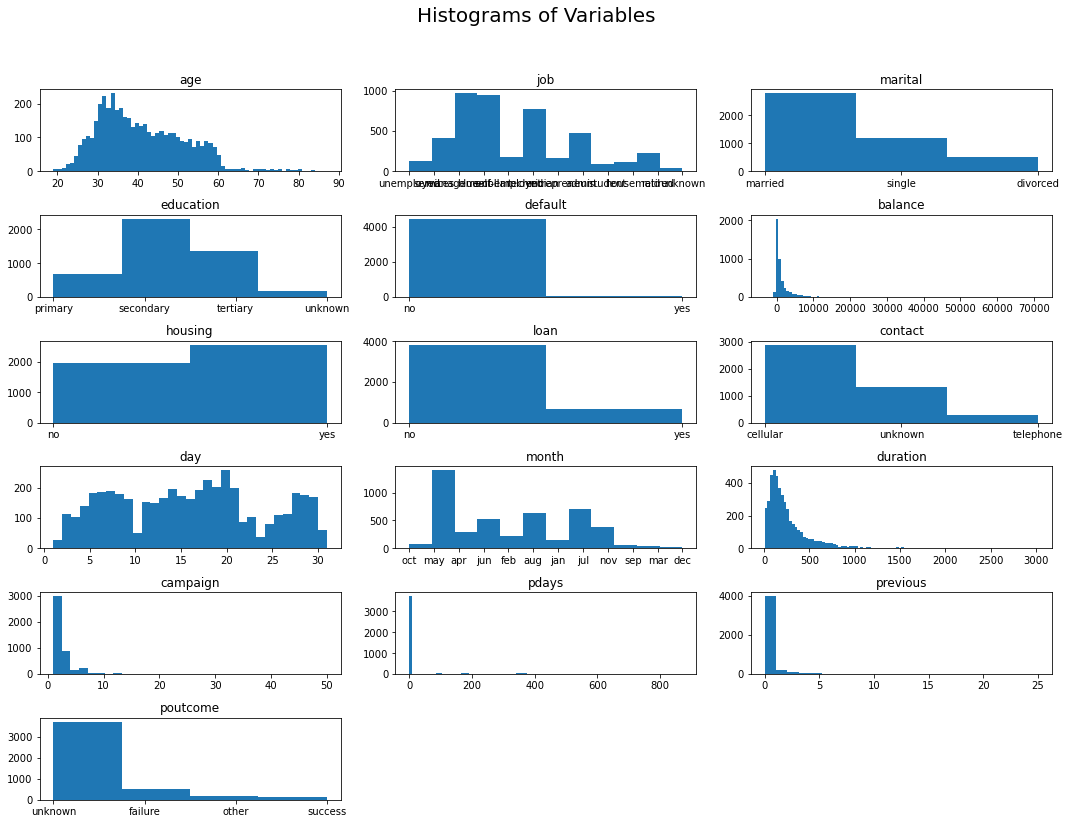

In [48]:
#Let's explore the different variables 

df2 = X
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Variables', fontsize=20)
for i in range(df2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df2.iloc[:, i], bins=vals)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


In [49]:
countpdays = len(data[data.pdays == -1])
print('% of "-1" on pdays: {:.3f}%'.format((countpdays/(len(data.pdays))*100)))

% of "-1" on pdays: 81.951%


The final step before deciding which features to remove is to check if some independent variables are correlated since we want to avoid multicollinearity.

<AxesSubplot:>

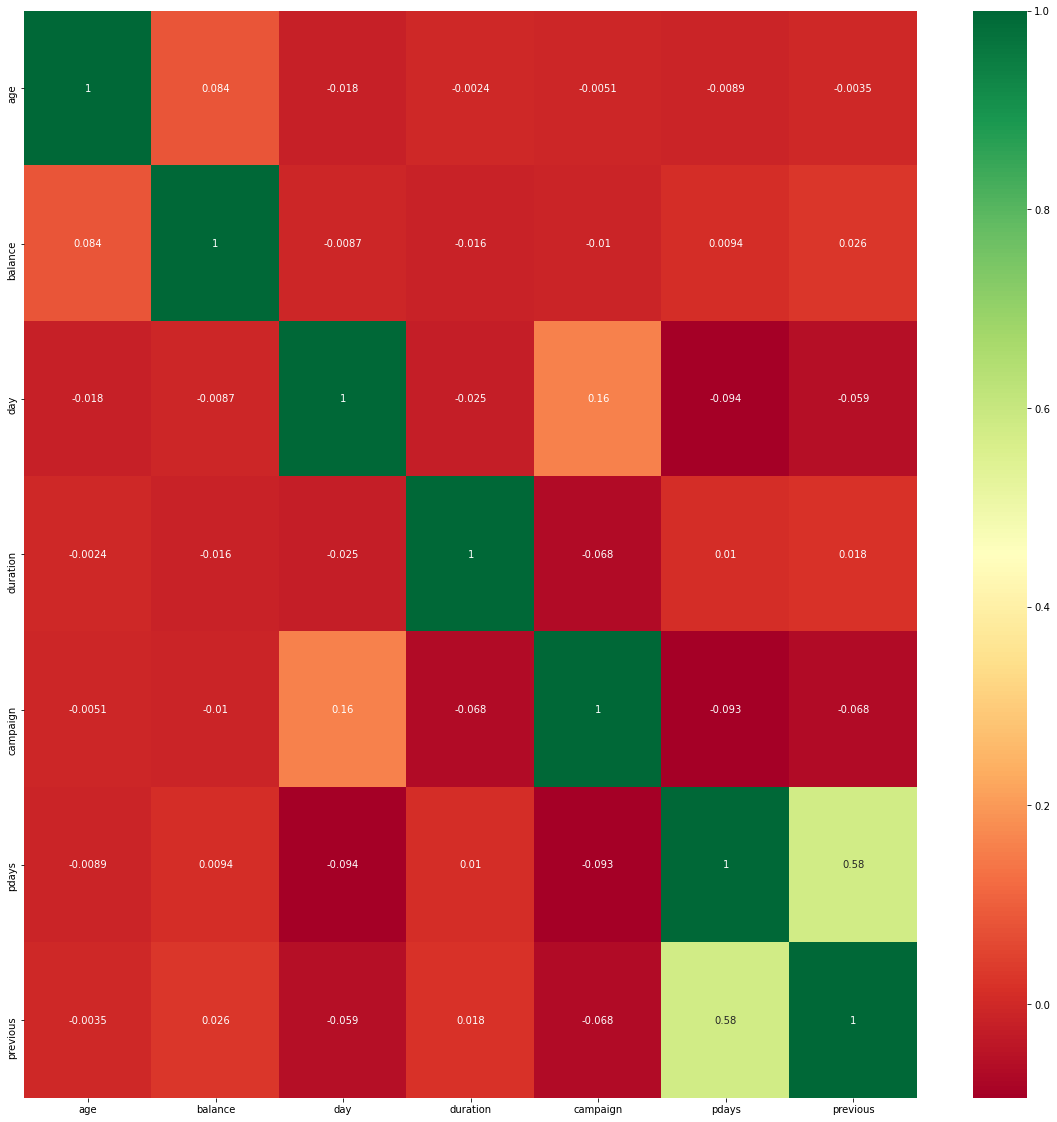

In [50]:
import seaborn as sns
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")
g


As we can see there are no variables highly correlated. 
The only ones that present some correlation are pdays and previous, so we could remove one of them.


**Final answer:**

Based on our previous analysis, we decide to drop:
* **Pdays**: Almost 82% of the observations have -1 as the value, which is not interpretable. Also, we remove it to avoid any kind of multicollinearity with previous.
* **Contact**: Most of the customers have been contacted by cellphone or we don't know the means (unknown). It doesn't give much information either. 
* **Duration**: Since this variable is not known before we do the call, we should remove it to avoid target leakage.

In [51]:
X.drop(['pdays','contact','duration'],axis = 1, inplace = True)

# Question 3. As most of the features are of a categorical nature, apply the LabelEncoder to the target data

In [58]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(dtype="int")

cat = X[['job',
        'marital',
        'education', 
        'default', 
        'housing', 
        'loan',
        'month',
        'poutcome']]

enc.fit_transform(cat)

categorical_df = pd.DataFrame(enc.transform(cat))

categorical_df.columns = ['job',
                        'marital',
                        'education',
                        'default',
                        'housing',
                        'loan',
                        'month',
                        'poutcome']

numerical = X[['age',
              'balance',
              'day',
              'campaign',
              'previous']]

X = numerical.join(categorical_df)

In [17]:
from sklearn.preprocessing import LabelEncoder
enc_label = LabelEncoder()
y = enc_label.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

# Question 4. Perform the data split using the provided SKLearn function on the encoded dataset.

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y, random_state=42)

By default, the train-test split is 75% train and 25% test.

# Question 5. Select a simple supervised model to train with the dataset and explain the decision.

Let's create a Random Forest.
We chose a Random Forest due to its versatility as an algorithm and the fact that is valid to solve a regression problem. It can handle categorical and real-valued features with ease—little to no preprocessing required. With proper cross-validation technique, they are readily tuned.

In [62]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [64]:
ens = RandomForestClassifier()
ens.fit(X_train, y_train)

print("RandomForestClassifier training score: {:.3f}".format(ens.score(X_train,y_train)))
print("RandomForestClassifier test score: {:.3f}".format(ens.score(X_test,y_test)))
display(pd.DataFrame([ens.feature_importances_],columns=X.columns))

RandomForestClassifier training score: 1.000
RandomForestClassifier test score: 0.892


,age,balance,day,campaign,previous,job,marital,education,default,housing,loan,month,poutcome
0,0.171071,0.188761,0.147231,0.068112,0.039064,0.081112,0.034669,0.046293,0.006134,0.025623,0.013822,0.114536,0.063572


The most relevant feature is **Balance** and the least relevant is  **Default**.

The difference in the metrics between train and test suggests overfitting. The problem here is that if we don't specify the number of trees, it takes 100 trees by default which leads to an overlearning of the training dataset.

# Question 6. Train a GradientBoostingClassifier, with n_estimators=10 and learning_rate=1, and compare the results with the previous algorithm.

In [66]:
ens_boost = GradientBoostingClassifier(n_estimators=10, learning_rate=1)
ens_boost.fit(X_train, y_train)
print("GradientBoostClassifier training score: {:.3f}".format(ens_boost.score(X_train,y_train)))
print("GradientBoostClassifier test score: {:.3f}".format(ens_boost.score(X_test,y_test)))
display(pd.DataFrame([ens_boost.feature_importances_],columns=X.columns))

GradientBoostClassifier training score: 0.906
GradientBoostClassifier test score: 0.877


,age,balance,day,campaign,previous,job,marital,education,default,housing,loan,month,poutcome
0,0.208379,0.144898,0.079418,0.025297,0.069361,0.050942,0.010467,0.010262,0.00891,0.016373,0.0,0.235854,0.139838


Now the difference between training and test is lower than before, we corrected the overfitting. 

The most important variable now is **month**. 

**Loan** is irrelevant in our model.

# Question 7. Using the PolynomialFeatures class, compute the second degree interactions of the dataset. Retrain the original model (selected by the student in question 5) and compare the results.

In [81]:
from sklearn.preprocessing import PolynomialFeatures

pol = PolynomialFeatures(degree=2)
X_poly = pol.fit_transform(X)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly,y, random_state = 42)


ens.fit(X_train_p, y_train_p)
print("Polynomial Ensemble training score: {:.3f}".format(ens.score(X_train_p, y_train_p)))
print("Polynomial Ensemble test score: {:.3f}".format(ens.score(X_test_p, y_test_p)))

Polynomial Ensemble training score: 1.000
Polynomial Ensemble test score: 0.889


With PolynomialFeatures we generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree (2 in this case). The number of features in the output array scales polynomially in the number of features of the input array, and exponentially in the degree. High degrees can cause overfitting. 

In this case, we can see that a degree of 2 shows a little bit less overfitting to our solution compared to the previous models, but still causes overfitting.

# Question 8. Using the function cross_val_score, and a Kfold with 5 folds, validate the original trained model (selected by the student in question 5) and the GradientBoostingClassifier. Which conclusions can be extracted?

In [82]:

from sklearn.model_selection import KFold, cross_val_score, cross_validate

kfold = KFold(n_splits = 5)
val = cross_validate(ens, X, y, cv=kfold)
print(val)

val_score = cross_val_score(ens, X, y, cv = kfold)
print("Mean validation scores: {:.3f}".format(val_score.mean()))

{'fit_time': array([0.40293074, 0.33038116, 0.34106994, 0.33839583, 0.331074  ]), 'score_time': array([0.02125525, 0.02065587, 0.02202296, 0.02148414, 0.02072692]), 'test_score': array([0.89281768, 0.88495575, 0.88053097, 0.8949115 , 0.88938053])}
Mean validation scores: 0.889


The goal of **cross-validation** is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like **overfitting or selection bias** and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).
Thus, using it helps us fine tune our Ensamble and get the most out of it, obtaining a score of over 89%.

# Question 9. Using the original (not encoded) dataset, apply the OneHotEncoder transformation to the whole dataset. Is there any difference in the number of features/columns than in the original?

In [86]:
from sklearn.preprocessing import OneHotEncoder

enc_oh = OneHotEncoder()
enc_oh.fit(X)
d_trans = enc_oh.transform(X)

print(d_trans.shape)
print(X.shape)

(4521, 2548)
(4521, 13)


As we can see the number of columns increases from 17 to 2548 due to One Hot Encoding in which variables take the form (0,1). The encoder has created as much features as types of categorical variables are in the dataset. Each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1

# Question 10. Retrain the original model (selected by the student in question 5) using the new encoded dataset, and compare the results with the previous results. Validate this model with this dataset using the same functions as in question 8.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(d_trans, y, random_state=42)

ens_encoded = RandomForestClassifier()
ens_encoded.fit(X_train, y_train)

print("RandomForestClassifier training score: {:.3f}".format(ens_encoded.score(X_train,y_train)))
print("RandomForestClassifier test score: {:.3f}".format(ens_encoded.score(X_test,y_test)))


RandomForestClassifier training score: 1.000
RandomForestClassifier test score: 0.897


In [89]:
val = cross_validate(ens_encoded, d_trans, y, cv=kfold)
print(val)

val_score = cross_val_score(ens_encoded, d_trans, y, cv = kfold)
print("Mean validation scores: {:.3f}".format(val_score.mean()))

{'fit_time': array([1.56100202, 1.49233603, 1.47148013, 1.46841288, 1.43379402]), 'score_time': array([0.02810788, 0.02764201, 0.02719188, 0.02786899, 0.0264771 ]), 'test_score': array([0.89060773, 0.88606195, 0.88606195, 0.8960177 , 0.88274336])}
Mean validation scores: 0.889


Our original model (see question 5) yielded a training score of 1.00 and a test score of 0.892. Using the encoded dataset  decreased the training score and slightly decreased th test score by 0.003. However, the encoded dataset is a lot larger and, on a bigger scale, could lead to slower performance. 

The score when we apply cross-validation (encoded dataset) is the same as in question 8 (no encoded dataset) since the only thing that changes is the way the variables are shown in the dataset, leading to a bigger size.

We can conclude that in this case, one hot encoding brought minor improvements without impacting performance much, however, since the new encoded dataset is larger, the original dataset might be more suitable to train this model. 